This part of the assignment is to get you introduced to using gradient descent within torch. You will be using input\
”data” generated (and visualised) like this:

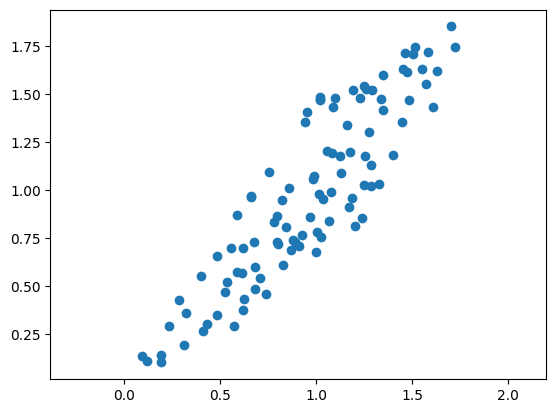

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import torch
# make up some data for x
D = 2
x= torch.rand(100,D)
x[:,0] = x[:,0] + x[:,1]
x[:,1] = 0.5*x[:,0] + x[:,1]
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)

An autoencoder is an unsupervised learner that carries out dimensionality reduction by mapping the data into a lower dimensional space and back ”out” again to form a ”reconstruction”. \
The loss is some measure of the difference between the original data items and their reconstructions.\
![pic](assets/pic1.jpg "Magic Gardens")

## Encoder function
### Input
* the shape of input x: (1,2)
* w_encoder: weight of encoder
* b_encoder: bias of encoder
### Output
* the shape of output: z (1)
### Variable
* encoder:\
 $z = x_0*w{0_encoder} + x_1*w{1encoder} + b_{encoder}$
* an encoder, which takes the 2-d inputs and produces a 1-dimensional z via a weighted sum plus a bias. 
* The encoder weights will be a 1-by-2 tensor and the encoder bias will be a 1-by-1 tensor.

In [10]:
def encoder(x, w_encoder, b_encoder):
    # Encoder: z = x0*w0_encoder + x_1*w_1_encoder + b_encoder
    z = torch.mm(x,w_encoder) + b_encoder
    return z

In [11]:
def decoder(z,w_decoder,b_decoder):
    z = torch.mm(w_decoder,z) + b_decoder
    return z

In [12]:
import torch
#import torch.nn.functional.mse_loss as MSE
import torch.nn.functional as F
def loss(predict,target):
    return F.mse_loss(predict,target)

In [13]:
v1 = torch.randn(1,2, requires_grad=True)
r1 = encoder(v1,w_encoder=wEncoder,b_encoder=bEncoder)
r1

tensor([[-3.5740]], grad_fn=<AddBackward0>)

In [14]:
decoder(r1,wEncoder,bEncoder)

tensor([[-4.1496],
        [-5.3620]], grad_fn=<AddBackward0>)

In [21]:
import matplotlib as plt

def plot(x,x_reconstruction,wEncoder):
    plt.scatter(x[:,0],x[:,1],color='cyan')
    plt.scatter(x_reconstruction.detach()[:,0],x_reconstruction.detach()[:,1])
    plt.plot([0,wEncoder[0,0]], [0,wEncoder[1,0]],'-r')
    plt.axis('equal')